# P-Value & KNN Regression

## 1. Combined Cycle Power Plant Data Set
The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (PE) of the plant.

### (a) Download the Combined Cycle Power Plant data from: 
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

### (b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

ii. Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

iii. What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from conda_build.features import feature_list
from docutils.nodes import legend
from nltk.cluster import euclidean_distance

In [2]:
plant_data = pd.read_excel('../data/Combined_Cycle_Power_Plant/Folds5x2_pp.xlsx')
print(plant_data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


- **There are 9568 rows and 5 columns in the data set. The amount of rows represents the amount of sample data. The last column (PE) is the label (dependent variable) and other columns are features (independent variables)**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Text(0.5, 0.98, 'Plots of each variables')

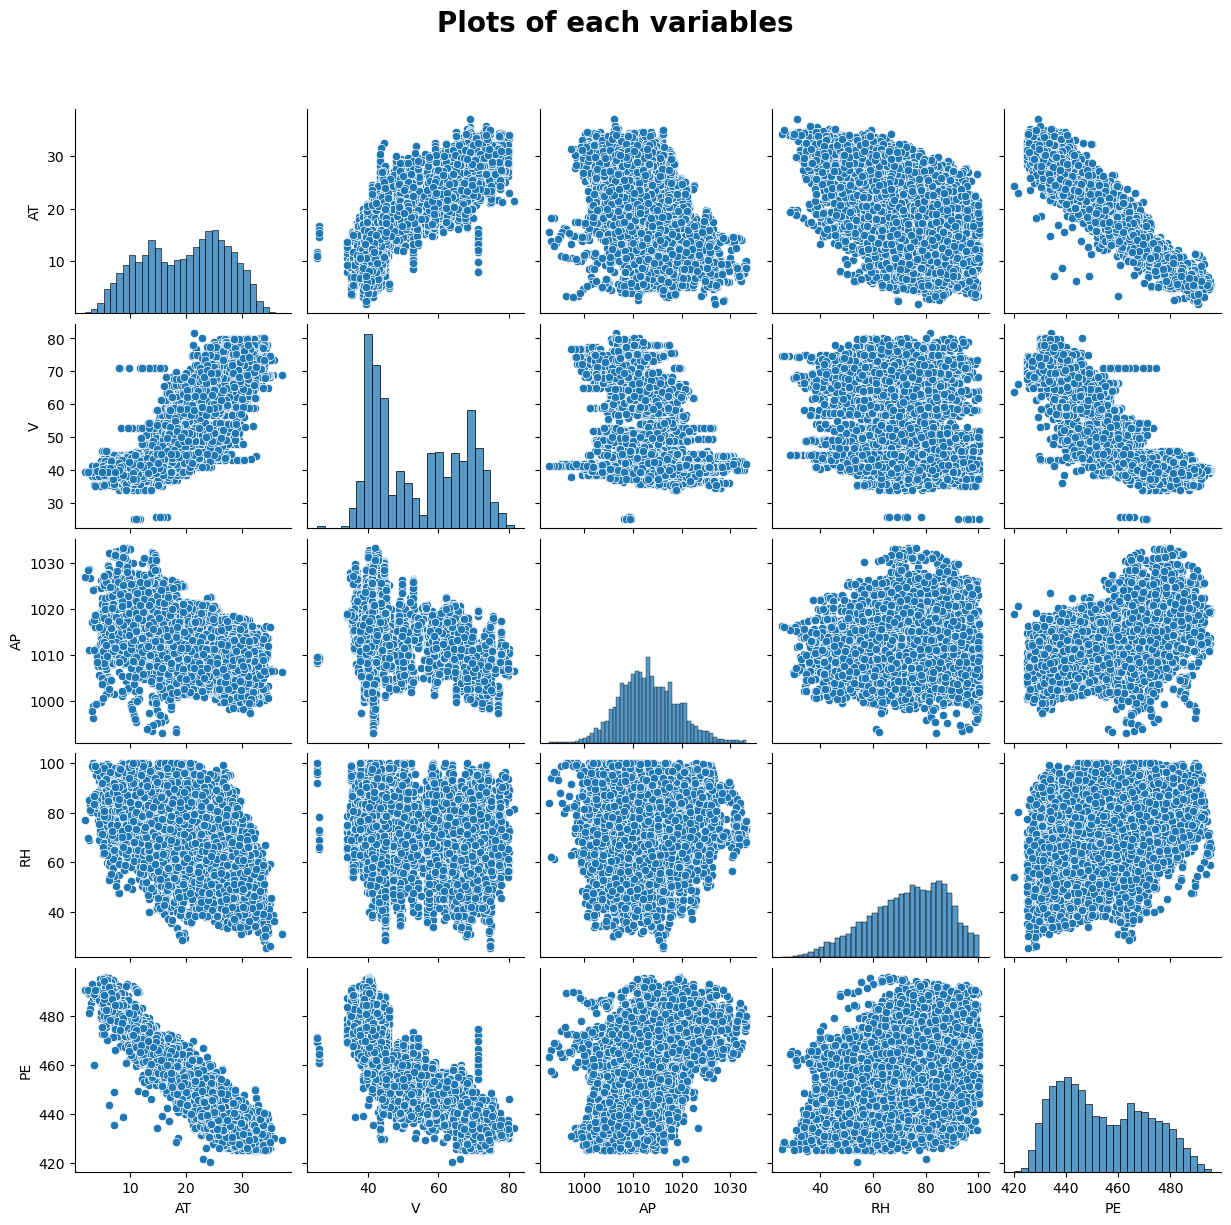

In [3]:
sns.pairplot(plant_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Plots of each variables', fontsize=20, weight='bold')

- **Temperature and Exhaust Vacuum show a clear negative correlation with net electrical energy output. Among them, the data distribution in the plot of Temperature and net electrical energy output exhibits a more obvious linear relationship, making it the best feature among the independent variables.**

In [4]:
summary = plant_data.describe().T
summary['range'] = summary['max'] - summary['min']
summary.rename(columns= {'50%': 'median', '25%': 'Q1', '75%': 'Q3'}, inplace=True)

summary

,count,mean,std,min,Q1,median,Q3,max,range
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11,35.30
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56,56.20
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30,40.41
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16,74.60
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76,75.50


### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [5]:
import numpy as np

## Linear Regression without sklearn
def compute_cost(X, y, theta):
    n = len(y)
    y_pred = X.dot(theta)
    cost = (1/2*n) * np.sum(np.square(y_pred - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    n = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        y_pred = X.dot(theta)
        loss = y_pred - y
        gradient = X.T.dot(loss) / n
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history[i] = cost
    return cost_history

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return y_pred, mse

def plot_regression(X, y, y_pred, title):
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_pred, color='red')
    plt.title(title)
    plt.show()

AT: mse = 29.43170201109351


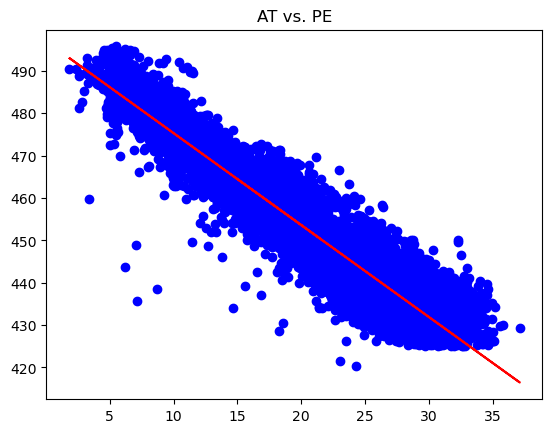

V: mse = 70.91465103018827


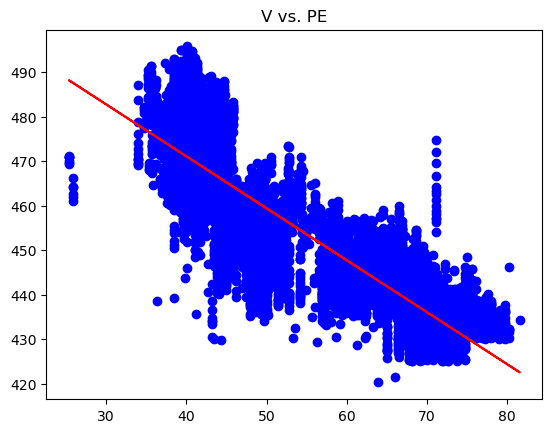

AP: mse = 212.97249983312636


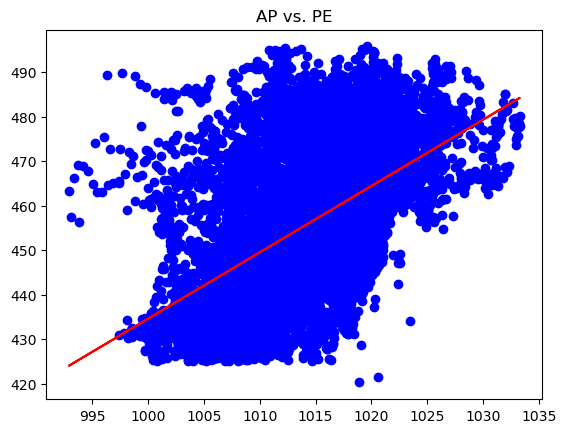

RH: mse = 246.99922809296348


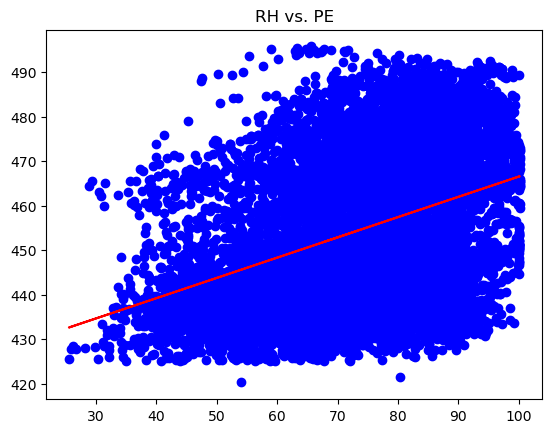

In [7]:
for col in plant_data.columns[:-1]:
    X = plant_data[col].values.reshape(-1, 1) # values: convert to numpy array, reshape: convert to 2D array  
    y = plant_data['PE'].values
    y_pred, mse = linear_regression(X, y)
    print(f'{col}: mse = {mse}')
    plot_regression(X, y, y_pred, f'{col} vs. PE')

- **AT and V are good predictors in this scenario, because there is an obvious relation between AT(or V) and PE**

- **There are some outliers in the AT and V plots, but it seems acceptable because there is no obvious impact in the final result**

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj= 0?

In [8]:
import statsmodels.api as sm

def linear_regression(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary(), model.params

In [9]:
X = plant_data.drop(columns=['PE'])
y = plant_data['PE']

stat_summary, params = linear_regression(X, y)
print(stat_summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:38:57   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

- **We can reject the null hypothesis for all predictors because the p-value is less than 0.05**

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [10]:
print(params)
multi_coef = params[1:]

const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64


In [11]:
simple_coef = []
for col in X.columns:
    summary, params = linear_regression(X[col], y)
    simple_coef.append(params.iloc[1])
    
print(simple_coef)

[-2.171319958517799, -1.1681351265557134, 1.4898716733991115, 0.45565010226298047]


/var/folders/8m/rjyy9z3n1h39x387rdrrh13c0000gn/T/ipykernel_37142/2111153158.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]))


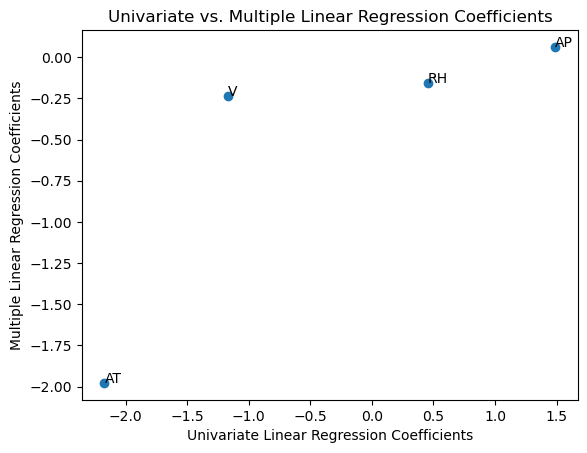

In [12]:
def plot(x, y, title):
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel('Univariate Linear Regression Coefficients')
    plt.ylabel('Multiple Linear Regression Coefficients')
    for i, txt in enumerate(X.columns):
        plt.annotate(txt, (x[i], y[i]))
    plt.show()
    
plot(simple_coef, multi_coef, 'Univariate vs. Multiple Linear Regression Coefficients')

- **The univariate coefficient and multiple coefficient of Temperature (AT) are very close in value, this means that AT has significant impact on multiple linear regression, making AT a great predictor for the response. This is the same result from the estimation above.**

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
$$

In [13]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X, y):
    polynomial = PolynomialFeatures(degree=3)
    X_poly = polynomial.fit_transform(X)
    X_poly = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly).fit()
    return model.summary(), model.params


X = plant_data.drop(columns=['PE'])
y = plant_data['PE']

for col in X.columns:
    summary, params = polynomial_regression(X[col].values.reshape(-1, 1), y) # values: convert to numpy array, reshape: convert to 2D array
    print(f'{col}: {summary}\n')

AT:                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:38:58   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248     

- **AT: x and x^2 are statistical significant. Although the coefficient of X^3 is small, it is still significant because the p-value is less than 0.05. As a result, the predictor AT has nonlinearity.**

- **V: x^2 is statistical insignificant with p-value higher than 0.05, but x and X^3 are still significant as their p-value lower than 0.05, which can reject the null hypothesis. As a result, the predictor V has nonlinearity.**

- **AP: The p-value of each terms of x are 0, so AP has the evidence of nonlinearity.**

- **RH: Same as above, the p-values are 0, which can reject the null hypothesis that the feature is not nonlinearity.**

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [14]:
def polynomial_regression(X, y):
    polynomial = PolynomialFeatures(interaction_only=True)
    X_poly = polynomial.fit_transform(X)
    X_poly = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly).fit()
    return model.summary(), polynomial.get_feature_names_out()

summary, features = polynomial_regression(X, y)

print(features)
print(summary)

['1' 'AT' 'V' 'AP' 'RH' 'AT V' 'AT AP' 'AT RH' 'V AP' 'V RH' 'AP RH']
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:38:58   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

- **x5 = 'AT x V'**
- **x7 = 'AT x RH'**
- **x8 = 'V x AP'**
- **x10 = 'AP x RH'**

**Those features are statistically significant because the p-value is less than 0.05.**

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [15]:
from sklearn.model_selection import train_test_split

X = plant_data.drop(columns=['PE'])
y = plant_data['PE']

# Split the data
data = train_test_split(X, y, test_size=0.3) 

In [16]:
def polynomial_regression(data, degree=2, interaction_only=False, remove=None):
    X_train, X_test, y_train, y_test = data
    # Polynomial regression
    polynomial = PolynomialFeatures(degree=degree, interaction_only=interaction_only)
    
    X_train_poly, X_test_poly = polynomial.fit_transform(X_train), polynomial.fit_transform(X_test)
    # Remove insignificant variables   
    if remove:
        X_train_poly = np.delete(X_train_poly, remove, axis=1)
        X_test_poly = np.delete(X_test_poly, remove, axis=1)
    X_train_poly, X_test_poly = sm.add_constant(X_train_poly), sm.add_constant(X_test_poly)
        
    
    feature_names = polynomial.get_feature_names_out()
    model = sm.OLS(y_train, X_train_poly).fit()
    summary = model.summary()
    train_mse = mean_squared_error(y_train, model.predict(X_train_poly))
    test_mse = mean_squared_error(y_test, model.predict(X_test_poly))
    return summary, train_mse, test_mse, feature_names

In [17]:
summary, train_mse, test_mse, feature_names = polynomial_regression(data)
print(summary)
print(f'Feature names: {feature_names}')
print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7188.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:38:58   Log-Likelihood:                -19267.
No. Observations:                6697   AIC:                         3.856e+04
Df Residuals:                    6682   BIC:                         3.867e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7672.5637   1464.639     -5.239      0.0

**Remove: [7 (AT AP), 9 (V^2), 10 (V AP), 11 (V RH)]**

In [18]:
remove = [7, 9, 10, 11]
summary, train_mse, test_mse, feature_names = polynomial_regression(data, remove=remove)
print(summary)
print(f'Feature names: {feature_names}')
print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:38:58   Log-Likelihood:                -19275.
No. Observations:                6697   AIC:                         3.857e+04
Df Residuals:                    6686   BIC:                         3.865e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.053e+04   1108.762     -9.493      0.0

- **The test MSE of model that removes insignificant features does not have significant reduce, which means the model is not improved by removing insignificant variables.**

### (i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1,2,...,100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

def knn_regression(data, k_list, normalize=False):
    X_train, X_test, y_train, y_test = data
    
    if normalize:
        X_train = (X_train - X_train.mean()) / X_train.std()
        X_test = (X_test - X_test.mean()) / X_test.std()
        
    train_errors, test_errors = [], []
    for k in k_list:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test)))
    return train_errors, test_errors

def plot_knn(k_list, train_errors, test_errors):
    plt.plot(k_list, train_errors, label='Train Error', marker='o')
    plt.plot(k_list, test_errors, label='Test Error', marker='o')
    plt.title('KNN Regression')
    plt.xlabel('1/k')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

Train errors: [0.0, 5.339108556069881, 7.451574432996533, 8.786060157533223, 9.74399015200836, 10.523809834005274, 11.199187069751002, 11.737825891723908, 12.136173065146176, 12.58288608600866, 12.822969214660072, 13.191895829704015, 13.438641723265654, 13.672557867290566, 13.96701776974765, 14.205352944065437, 14.369134461797438, 14.580826432048996, 14.757432758662773, 14.929125071188599, 15.071241690884714, 15.165892684062317, 15.314192453608301, 15.461026956229368, 15.630301940427055, 15.782111503737873, 15.928524959029012, 16.035270670369464, 16.15522737818787, 16.24486722824482, 16.34738994635802, 16.411957133864156, 16.49326555545546, 16.59543389840929, 16.64882347289221, 16.722307422304898, 16.820924428205206, 16.89894272928672, 16.941200326404395, 17.02101101446543, 17.067563614347108, 17.13778471276271, 17.20285553461334, 17.258013764982962, 17.28724566710357, 17.37206390148595, 17.428450347483004, 17.494298269248624, 17.54285516624681, 17.600572898683, 17.657076713634627, 17.

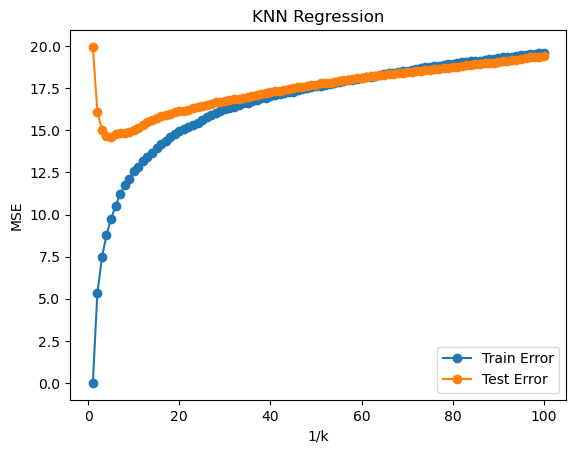

Best k: 5, Test MSE: 14.572344367816088


In [20]:
k_list = [k for k in range(1, 101)]
train_errors, test_errors = knn_regression(data, k_list, normalize=True)
print(f'Train errors: {train_errors}\n Test errors: {test_errors}')
plot_knn(k_list, train_errors, test_errors)
print(f'Best k: {test_errors.index(min(test_errors)) + 1}, Test MSE: {min(test_errors)}')

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [21]:
print('Linear Regression Test MSE:', test_mse)
print('KNN Regression Test MSE:', min(test_errors))

Linear Regression Test MSE: 17.288330632298823
KNN Regression Test MSE: 14.572344367816088


- **The test MSE of KNN Regression is lower than the linear regression model, this means KNN Regression is a better model for this dataset. Linear Regression assumed that predictors and response are non-linear, but we found that some features are statistical insignificant with p-value > 0.05.**

## 2.  ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a)The sample size n is extremely large, and the number of predictors p is small.

(b)The number of predictors p is extremely large, and the number of observations n is small.

(c)The relationship between the predictors and response is highly nonlinear.

(d)The variance of the error terms, i.e.σ^2= Var(ε), is extremely high.

- **a. Flexible method is better than inflexible method because the sample data is large, so our model can learn more from the data. In this case, the model can be more complex and flexible. The number of predictors is small, so the variance is small and the model can be less overfitting.**

- **b. Inflexible method is better than flexible method. Because the number of observations n is small and the number of predictors p is large, the model's variance is high (model be influenced by randomness increase) and bias is low (model is too complex that it might not predict unknown data properly), this will cause the model to be overfitting.**

- **c. Flexible method is better than inflexible method. Because the relationship between the predictors and response is highly nonlinear, the model should be more flexible to fit the data. Also, nonlinear is the assumption of Linear Regression.**

- **d. Inflexible method is better than flexible method. Because the variance of the error terms is extremely high, the randomness will have significant impact on the model, making model overfitting.**

## 3. ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

| Obs. | X1  | X2  | X3  | Y     |
|------|-----|-----|-----|-------|
| 1    |  0  |  3  |  0  | Red   |
| 2    |  2  |  0  |  0  | Red   |
| 3    |  0  |  1  |  3  | Red   |
| 4    |  0  |  1  |  2  | Green |
| 5    | -1  |  0  |  1  | Green |
| 6    |  1  |  1  |  1  | Red   |

RedSuppose we wish to use this data set to make a prediction forY when X1=X2=X3= 0 usingK-nearest neighbors.

(a)Compute the Euclidean distance between each observation and the test point,X1=X2=X3= 0.

(b)What is our prediction with K= 1? Why?

(c)What is our prediction with K= 3? Why?

(d)If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

- **a.** 
    - **$d1 = \sqrt{0^2 + 3^2 + 0^2} = 3$**
    - **$d2 = \sqrt{2^2 + 0^2 + 0^2} = 2$**
    - **$d3 = \sqrt{0^2 + 1^2 + 3^2} = \sqrt{10}$**
    - **$d4 = \sqrt{0^2 + 1^2 + 2^2} = \sqrt{5}$**
    - **$d5 = \sqrt{-1^2 + 0^2 + 1^2} = \sqrt{2}$**
    - **$d6 = \sqrt{1^2 + 1^2 + 1^2} = \sqrt{3}$**

- **b. The prediction is Green because the nearest neighbor is 5, which has the shortest distance $\sqrt{5}$.**
- **c. The prediction is Red because the nearest neighbors should have 3 value, which are 2, 5, 6, and they are 2 Red int those 3 nearest neighbors.**
- **d. The best value of K should be small because model should be more flexible to fit the data.**